In [1]:
import keras                         #Important Imports
from keras.applications.vgg16 import VGG16
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import glob as glob
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
image_size=224   #resize image to this 
vgg=VGG16(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))  #add preprocessing layer
#vgg.summary()



In [3]:
for layer in vgg.layers[:-1]:             # freeze all layer except last layer (ie 5th pooling layer)
    layer.trainable=False
#vgg.summary()
    


In [4]:
#for layer in model.layers:                #layer trainable observation
    #print(layer,layer.trainable)

In [5]:
train_path='/home/gaurav/Downloads/data/train'
valid_path='/home/gaurav/Downloads/data/val'                    # path to train and test data 

In [6]:
folders=glob.glob("/home/gaurav/Downloads/data/train/*")    #useful for getting no of classes

In [7]:
x=Flatten()(vgg.output)
prediction=Dense(len(folders),activation='softmax')(x)    # no of classes=19 ie 19 softmax layer

In [8]:
model=Model(inputs=vgg.input,outputs=prediction)   #model object
model.summary()          # model summary 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [9]:
#cost and optimization method
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
categories=['Airport','Beach','Bridge','Commercial','Desert','Farmland','footballField','Forest','Indusrial','Meadow','Mountain','Park','Parking','Pond','Port','railwayStation','Resedential','River','Viaduct']


In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(rescale=1./255, 
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  rotation_range=30,
                                  width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 
                                )

test_datagen= ImageDataGenerator(rescale=1./255)


training_set= train_datagen.flow_from_directory( '/home/gaurav/Downloads/data/train',
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='categorical'     
                                                )
test_set=test_datagen.flow_from_directory( '/home/gaurav/Downloads/data/val',
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical' 
                                        )


Found 795 images belonging to 19 classes.
Found 210 images belonging to 19 classes.


In [11]:
#fit the model 

r= model.fit_generator(
                         training_set,
                         validation_data=test_set,
                         epochs=2,
                         steps_per_epoch=len(training_set),
                         validation_steps=len(test_set)      )


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/2
25/25 [==============================] - 44s 2s/step - loss: 1.7171 - acc: 0.4693 - val_loss: 0.7952 - val_acc: 0.7143
Epoch 2/2
25/25 [==============================] - 25s 1s/step - loss: 0.6763 - acc: 0.7811 - val_loss: 0.5395 - val_acc: 0.7905


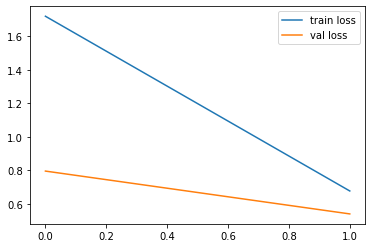

<Figure size 432x288 with 0 Axes>

In [12]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('train-val_acc')


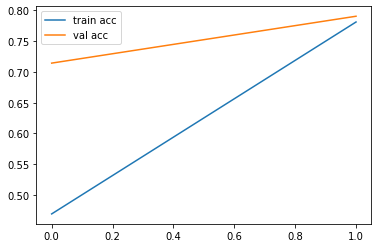

<Figure size 432x288 with 0 Axes>

In [13]:
# accuracies
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
#confusion Matrix

test_set.reset()
y_pred=model.predict_generator(test_set,steps=10,verbose=1)
print(y_pred)

10/10 [==============================] - 8s 781ms/step
[[5.07195818e-06 9.11975920e-01 3.41206469e-05 ... 7.00791531e-07
  2.06684888e-07 1.55349862e-05]
 [3.30465764e-01 3.80070378e-05 3.30415159e-03 ... 1.29329716e-03
  9.12830606e-03 8.80814064e-03]
 [7.19031523e-05 3.35580444e-06 6.54095857e-07 ... 3.00801275e-07
  1.24730525e-06 3.06119091e-06]
 ...
 [1.74447556e-03 1.32592786e-02 3.60016929e-05 ... 1.09879045e-04
  2.04415232e-06 3.51798750e-04]
 [7.19031523e-05 3.35580444e-06 6.54095857e-07 ... 3.00801275e-07
  1.24730525e-06 3.06119091e-06]
 [8.13588724e-02 3.32900777e-06 1.43262092e-03 ... 2.26045051e-03
  4.89462048e-01 5.11682410e-05]]


In [21]:
predicted_class_indices=np.argmax(y_pred,axis=1)
print(predicted_class_indices)

[ 1  0 14 11 12  7  9 14 11  3  4  4  9 10 12 12  4  2 12  6  9  8  4 10
  1 16  5 10  4 11  4 11 18 10 13 18  9  3  4  5 12 17  7  4 14 18 14 12
 15 10  4  0  4 15  2 16 11 13 11 10 14 18 18  6  0 17 12  1  2  2 10 17
 16  9  5  4 12 12 13 15 16  7 17  4  5  4 14  4  8 11  5  5 14 14  4  4
  6  1 12 16  2 11 10 14  1  9 14  9  7 13  1 17 10 14  1  8  4 14  4  8
 14  0  4  5 16 18  4  0 17  4  7 18  5 14  0  4 16 14 14 15 15  2  4 15
  4 11  0 17 14 16 14  1  5 14  6 15  2 17 17  7  9  2 11 15 14 18  4 16
  1 18 15 13 10  0 18  9 13 12 13 15 11 16 16  2 16  6 17 13  0  1 13 14
 15  7  9 10 14 11 17 10 15 13 13 10  2  8 11 15  4  6  7 12 17 13 14  2
  5  4  0  4 15  8  4 14  7 14  9  4 12 14 11 18  9 13  2 18 12 13  5  4
  2 16 14 14 17 15  2  9 16  4 17  9 16 14  9 15  5 14  9 13  0 10  7 14
 11 17 17 10 15 18 16  6  9 13 13  5 14  7 10  9 18  4  8 14 11 12  1 16
 12  2  4  6  5  8 11 13 14  0 15  1  2 16 13 10 14 17]


In [26]:
labels = (training_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
print(predictions)

['Beach', 'Airport', 'Residential', 'Parking', 'Pond', 'Industrial', 'Mountain', 'Residential', 'Parking', 'Commercial', 'Desert', 'Desert', 'Mountain', 'Park', 'Pond', 'Pond', 'Desert', 'Bridge', 'Pond', 'Forest', 'Mountain', 'Meadow', 'Desert', 'Park', 'Beach', 'Viaduct', 'Farmland', 'Park', 'Desert', 'Parking', 'Desert', 'Parking', 'railwayStation', 'Park', 'Port', 'railwayStation', 'Mountain', 'Commercial', 'Desert', 'Farmland', 'Pond', 'footballField', 'Industrial', 'Desert', 'Residential', 'railwayStation', 'Residential', 'Pond', 'River', 'Park', 'Desert', 'Airport', 'Desert', 'River', 'Bridge', 'Viaduct', 'Parking', 'Port', 'Parking', 'Park', 'Residential', 'railwayStation', 'railwayStation', 'Forest', 'Airport', 'footballField', 'Pond', 'Beach', 'Bridge', 'Bridge', 'Park', 'footballField', 'Viaduct', 'Mountain', 'Farmland', 'Desert', 'Pond', 'Pond', 'Port', 'River', 'Viaduct', 'Industrial', 'footballField', 'Desert', 'Farmland', 'Desert', 'Residential', 'Desert', 'Meadow', 'Par

In [30]:

from sklearn.metrics import classification_report, confusion_matrix
test_set.reset()
confusion_matrix(y_pred,test_set)


ValueError: Found input variables with inconsistent numbers of samples: [306, 7]

In [ ]:
import tensorflow as tf

from keras.models import load_model


In [ ]:

model.save('Whu_trained.h5')